In [35]:
import torch
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import csv

In [36]:
# Dataset config
NUM_ENCODE_TIME_STEPS = 40
NUM_DECODE_TIME_STEPS = 5

DATA_TYPE = "sin"

In [93]:
# Makeup data tensor

temp_tensor = torch.empty(20000)


if DATA_TYPE == "polynomial":
    temp_tensor[0] = 1
    for i in range(1, 20000):
        temp_tensor[i] = temp_tensor[i-1] * 1.0001
elif DATA_TYPE == "linear":
    for i in range(20000):
        temp_tensor[i] = 3 + i
elif DATA_TYPE == "sin":
    for i in range(20000):
        temp_tensor[i] = math.sin(i / 100) + math.log(i + 2) * 3
else:
    raise(NotImplementedError)

print(temp_tensor)


tensor([ 2.0794,  3.3058,  4.1789,  ..., 28.8228, 28.8276, 28.8325])


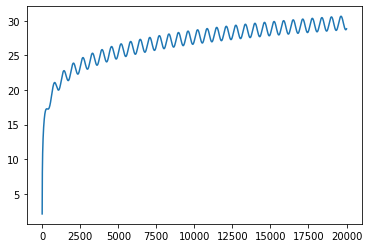

In [94]:
plt_time = list(range(len(temp_tensor)))
plt.plot(plt_time, temp_tensor, label="Temperature")

In [95]:
# Make input time serie data and target time serie data tensor 
X_shape = (temp_tensor.shape[0] - NUM_ENCODE_TIME_STEPS - NUM_DECODE_TIME_STEPS, NUM_ENCODE_TIME_STEPS)
y_shape = (temp_tensor.shape[0] - NUM_ENCODE_TIME_STEPS - NUM_DECODE_TIME_STEPS, NUM_DECODE_TIME_STEPS)

print("Encode time serie data shape:", X_shape)
print("Decode time serie data shape:", y_shape)

X = torch.empty(X_shape)
y = torch.empty(y_shape)

# Change from last time step (more numerically stable for the neural net)
for i in range(X.shape[0]):
    serie_end_i = i + NUM_ENCODE_TIME_STEPS + NUM_DECODE_TIME_STEPS
    time_serie = (temp_tensor[i+1:serie_end_i+1] - temp_tensor[i:serie_end_i]) / temp_tensor[i:serie_end_i]
    X[i] = time_serie[:NUM_ENCODE_TIME_STEPS]
    y[i] = time_serie[NUM_ENCODE_TIME_STEPS:]

print("Training X:\n", X)
print("Training y:\n", y)

Encode time serie data shape: (19955, 40)
Decode time serie data shape: (19955, 5)
Training X:
 tensor([[5.8977e-01, 2.6409e-01, 1.6259e-01,  ..., 7.5102e-03, 7.2870e-03,
         7.0761e-03],
        [2.6409e-01, 1.6259e-01, 1.1464e-01,  ..., 7.2870e-03, 7.0761e-03,
         6.8764e-03],
        [1.6259e-01, 1.1464e-01, 8.7243e-02,  ..., 7.0761e-03, 6.8764e-03,
         6.6870e-03],
        ...,
        [1.7011e-05, 2.0532e-05, 2.3987e-05,  ..., 1.4172e-04, 1.4488e-04,
         1.4804e-04],
        [2.0532e-05, 2.3987e-05, 2.7442e-05,  ..., 1.4488e-04, 1.4804e-04,
         1.5120e-04],
        [2.3987e-05, 2.7442e-05, 3.0962e-05,  ..., 1.4804e-04, 1.5120e-04,
         1.5429e-04]])
Training y:
 tensor([[0.0069, 0.0067, 0.0065, 0.0063, 0.0062],
        [0.0067, 0.0065, 0.0063, 0.0062, 0.0060],
        [0.0065, 0.0063, 0.0062, 0.0060, 0.0059],
        ...,
        [0.0002, 0.0002, 0.0002, 0.0002, 0.0002],
        [0.0002, 0.0002, 0.0002, 0.0002, 0.0002],
        [0.0002, 0.0002, 0.0002,

In [96]:
X = X * 100
y = y * 100

In [97]:
torch.save(X, "./../X.pt")
torch.save(y, "./../y.pt")

In [98]:
X = torch.load("./../X.pt")
y = torch.load("./../y.pt")
print(X)
print(y)

tensor([[5.8977e+01, 2.6409e+01, 1.6259e+01,  ..., 7.5102e-01, 7.2870e-01,
         7.0761e-01],
        [2.6409e+01, 1.6259e+01, 1.1464e+01,  ..., 7.2870e-01, 7.0761e-01,
         6.8764e-01],
        [1.6259e+01, 1.1464e+01, 8.7243e+00,  ..., 7.0761e-01, 6.8764e-01,
         6.6870e-01],
        ...,
        [1.7011e-03, 2.0532e-03, 2.3987e-03,  ..., 1.4172e-02, 1.4488e-02,
         1.4804e-02],
        [2.0532e-03, 2.3987e-03, 2.7442e-03,  ..., 1.4488e-02, 1.4804e-02,
         1.5120e-02],
        [2.3987e-03, 2.7442e-03, 3.0962e-03,  ..., 1.4804e-02, 1.5120e-02,
         1.5429e-02]])
tensor([[0.6876, 0.6687, 0.6507, 0.6337, 0.6174],
        [0.6687, 0.6507, 0.6337, 0.6174, 0.6019],
        [0.6507, 0.6337, 0.6174, 0.6019, 0.5872],
        ...,
        [0.0151, 0.0154, 0.0157, 0.0160, 0.0164],
        [0.0154, 0.0157, 0.0160, 0.0164, 0.0167],
        [0.0157, 0.0160, 0.0164, 0.0167, 0.0170]])


In [99]:
print(X.shape)
print("Average absolute change:", torch.mean(torch.absolute(X)))
print("Maximum change:", torch.max(y))
print("Minimum change:", torch.min(y))

torch.Size([19955, 40])
tensor(0.0063)
Maximum change tensor(0.6876)
Minimum change in tensor(-0.0375)


In [34]:
# Checking for nan data
assert(torch.sum(X != X) == 0)
assert(torch.sum(y != y) == 0)